<a href="https://colab.research.google.com/github/31-10-05/Machine-Learning-Projects-on-Time-Series-Forecasting/blob/main/lstm_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

96 48
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 - 2s - 18ms/step - loss: 0.0275
Epoch 2/100
94/94 - 0s - 3ms/step - loss: 0.0125
Epoch 3/100
94/94 - 0s - 2ms/step - loss: 0.0101
Epoch 4/100
94/94 - 0s - 3ms/step - loss: 0.0092
Epoch 5/100
94/94 - 0s - 2ms/step - loss: 0.0083
Epoch 6/100
94/94 - 0s - 2ms/step - loss: 0.0076
Epoch 7/100
94/94 - 0s - 3ms/step - loss: 0.0067
Epoch 8/100
94/94 - 0s - 3ms/step - loss: 0.0058
Epoch 9/100
94/94 - 0s - 2ms/step - loss: 0.0050
Epoch 10/100
94/94 - 0s - 3ms/step - loss: 0.0043
Epoch 11/100
94/94 - 0s - 2ms/step - loss: 0.0037
Epoch 12/100
94/94 - 0s - 3ms/step - loss: 0.0032
Epoch 13/100
94/94 - 0s - 3ms/step - loss: 0.0029
Epoch 14/100
94/94 - 0s - 3ms/step - loss: 0.0025
Epoch 15/100
94/94 - 0s - 3ms/step - loss: 0.0024
Epoch 16/100
94/94 - 0s - 4ms/step - loss: 0.0022
Epoch 17/100
94/94 - 0s - 4ms/step - loss: 0.0022
Epoch 18/100
94/94 - 1s - 6ms/step - loss: 0.0021
Epoch 19/100
94/94 - 1s - 7ms/step - loss: 0.0021
Epoch 20/100
94/94 - 1s - 5ms/step - loss: 0.0020
Epoch 21/100
94/94 -

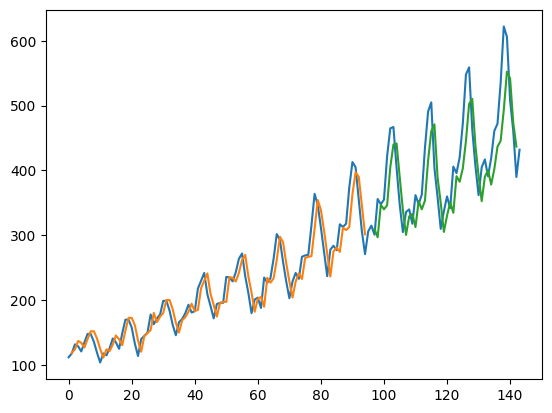

In [22]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
#fix random seed for reproducibilty
numpy.random.seed(7)

#load the dataset
dataframe = pandas.read_csv('/content/airline-passengers.csv', usecols = [1], engine = 'python')
dataset = dataframe.values
dataset = dataset.astype('float32')

#normalise the dataset
scaler = MinMaxScaler(feature_range = (0,1))
dataset = scaler.fit_transform(dataset)

#split into train and test sets
train_size = int(len(dataset)*0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:],dataset[train_size:len(dataset),:]
print(len(train),len(test))

#convert an array of values into a dataset matrix
def create_dataset(dataset, look_back = 1):
  dataX, dataY = [],[]
  for i in range (len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)

#reshape into X=t and Y= t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

#reshape input to be [sample, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

#create and fit the LTSM network
model = Sequential()
model.add(LSTM(4, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs = 100, batch_size = 1, verbose = 2)

#make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

#calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

#shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

#shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()